<a href="https://colab.research.google.com/github/gwiederhecker/F429_notas/blob/master/2020_2s/aula3/Exemplo_exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import glob
# Importing drive method from colab for accessing google drive
from google.colab import drive
import numpy as np
import pandas as pd # pacote python
import matplotlib.pyplot as plt # fazer graficosasd asdsada
glob.glob('*')

['drive', 'sample_data']

In [18]:
# This will require authentication : Follow the steps as guided
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
data_files = glob.glob("/content/drive/My Drive/Colab Notebooks/F429/2020_2s/dados*")
file_name = data_files[0]

In [24]:
data = pd.read_csv(file_name,sep='\t') # pois escolhi TAB como separador!

In [25]:
data.head()

,Frequencia (Hz),Amplitude Ch1 (V),Amplitude Ch2,T (s),tau (s),f (Hz),omega (rad/s),phi (graus),F.D.E (ms),m.FDE (ms),incerteza - (ms),F.D.E (V),m.F.D.E (V),incerteza - (V)
0,12.8090,8.4,0.036,0.0800,0.02000,12.50,78.54,90.000,25.0,5.0,1.021,0.01,0.002,0.0004
1,23.9105,8.8,0.064,0.0400,0.01000,25.00,157.08,90.000,25.0,5.0,1.021,0.01,0.002,0.0004
2,28.1092,8.8,0.088,0.0355,0.00887,28.17,176.99,89.949,5.0,1.0,0.204,0.02,0.004,0.0008
3,40.9031,8.8,0.126,0.0250,0.00610,40.00,251.33,87.840,5.0,1.0,0.204,0.02,0.004,0.0008
4,107.4070,8.8,0.320,0.0093,0.00225,107.53,675.61,87.097,2.5,0.5,0.102,0.05,0.010,0.0020


In [33]:

data.columns[0]

'Frequencia (Hz)'

In [26]:
data['Frequencia (Hz)']

0       12.8090
1       23.9105
2       28.1092
3       40.9031
4      107.4070
5      140.9000
6      210.9600
7      528.1170
8      764.1150
9     2349.3400
10    3308.3400
11    5678.3800
12    9415.2300
Name: Frequencia (Hz), dtype: float64

In [35]:

data[data.columns[1]]

0     8.4
1     8.8
2     8.8
3     8.8
4     8.8
5     9.0
6     8.8
7     8.8
8     8.8
9     8.8
10    8.6
11    8.4
12    8.0
Name: Amplitude Ch1 (V), dtype: float64

In [30]:
data.iloc[:,2]

0     0.036
1     0.064
2     0.088
3     0.126
4     0.320
5     0.420
6     0.630
7     1.550
8     2.150
9     5.200
10    6.200
11    7.600
12    8.000
Name: Amplitude Ch2, dtype: float64

Text(0, 0.5, 'Tensão (V)')

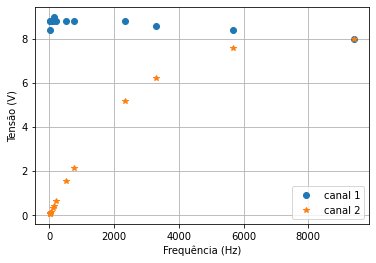

In [51]:
plt.plot(data[data.columns[0]],data[data.columns[1]],'o',label='canal 1')
plt.plot(data[data.columns[0]],data[data.columns[2]],'*',label='canal 2')
plt.legend()
plt.grid()
plt.xlabel('Frequência (Hz)')
plt.ylabel('Tensão (V)')

In [52]:
data[data.columns[0]].describe()

count      13.000000
mean     1739.116985
std      2871.963270
min        12.809000
25%        40.903100
50%       210.960000
75%      2349.340000
max      9415.230000
Name: Frequencia (Hz), dtype: float64

Text(0, 0.5, 'Tensão (V)')

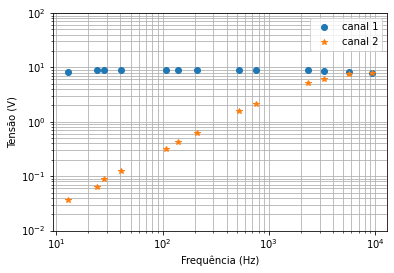

In [59]:
plt.loglog(data[data.columns[0]],data[data.columns[1]],'o',label='canal 1')
plt.loglog(data[data.columns[0]],data[data.columns[2]],'*',label='canal 2')
plt.legend()
plt.grid()
plt.ylim([1e-2,1e2])
plt.grid(True,which='Both')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Tensão (V)')

In [60]:
data['phi (graus)'].describe()

count    13.000000
mean     68.259923
std      32.407787
min       1.713000
25%      51.429000
50%      85.263000
75%      87.840000
max      90.000000
Name: phi (graus), dtype: float64

Text(0, 0.5, 'Fase, $\\Delta\\phi$')

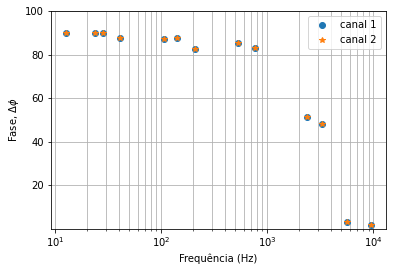

In [62]:
plt.semilogx(data[data.columns[0]],data['phi (graus)'],'*',label='canal 2-canal1')
plt.legend()
plt.grid()
plt.ylim([1e-2,1e2])
plt.grid(True,which='Both')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Fase, $\Delta\phi$')

Text(0, 0.5, 'g')

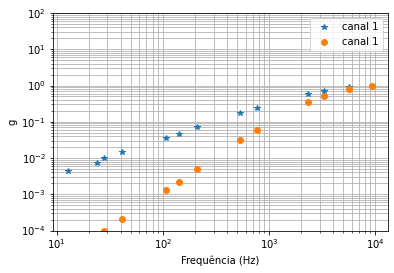

In [73]:
g = data[data.columns[2]]/data[data.columns[1]]
G= np.abs(g)**2
plt.loglog(data[data.columns[0]],g,'*',label='canal 1')
plt.loglog(data[data.columns[0]],G,'o',label='canal 1')
plt.legend()
plt.grid()
plt.ylim([1e-4,1e2])
plt.grid(True,which='Both')
plt.xlabel('Frequência (Hz)')
plt.ylabel('g')

Text(0, 0.5, 'Ganho')

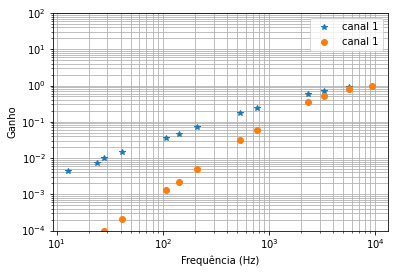

In [74]:

plt.loglog(data[data.columns[0]],g,'*',label='canal 1')
plt.loglog(data[data.columns[0]],G,'o',label='canal 1')
plt.legend()
plt.grid()
plt.ylim([1e-4,1e2])
plt.grid(True,which='Both')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Ganho')

$G(\omega)=P_{out}(\omega)/P_{in}(\omega)$

$P_{R}=V^2/R$

$G(\omega)=|V_{out}|^2/|V_{in}|^2=|V_{out}/V_{in}|^2$
$$F_{dB}=10*\log_{10}|F|^2$$
$$F_{dB}=20*\log_{10}|F|$$

Text(0, 0.5, 'Ganho (dB)')

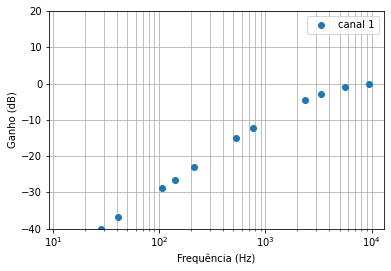

In [77]:
# GdB=10*np.log10(G)
GdB=20*np.log10(g)
plt.semilogx(data[data.columns[0]],GdB,'o',label='canal 1')
plt.legend()
plt.grid()
plt.ylim([-40,20])
plt.grid(True,which='Both')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Ganho (dB)')